import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'trainable_last_large_beta'
image_title = '$\\|\\beta\\|_2^2$: 16, Trainable: last layer'
plotly_title = r'$\|\beta\|_2^2$: 16, Trainable: last layer'
exp = 'summary/' + filename + '.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue

#dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

epochs_list = np.unique(df['epochs'])
color_list = 'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    ax[2].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')

fig.suptitle(image_title)
plt.legend(epochs_list, title='epochs')
plt.savefig('pdf_plots/' + filename + '.pdf')

epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'orange']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    line = go.scatter.Line(color = color)
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    error_y = dict(type = 'data', array = std, color = color, width = 0, thickness = 0.9)
    marker = dict(size = 3)
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line,  error_y = error_y, marker = marker, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker,  name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log', title = 'nodes')
fig.update_layout(height = 400, width = 1000, legend_title_text='epochs', title = plotly_title)

fig.show()
plotly.offline.plot(fig, filename = 'html_plots/' + filename + '.html')

In [7]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
with open('summary/mse_no_activation.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
df.dtypes
#df1 = df.loc[df['epochs'] == 5000]

nodes              int64
SNR              float64
train-mse        float64
train-mse-bal    float64
majority-mse     float64
minority-mse     float64
trainable         object
setup             object
dtype: object

In [8]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['setup', 'SNR',  'nodes'], as_index=False).agg(agg_dict)
result.loc[result['setup']=='diff-core']

setup     SNR nodes     train-mse                     majority-mse  \
                                     mean           std count         mean   
0   diff-core    0.01   224  7.856054e-25  1.321453e-24   500  8473.708981   
1   diff-core    0.01   325  6.210952e-25  2.078214e-24   500  2134.026790   
2   diff-core    0.01   471  4.272381e-25  8.319564e-25   500  1352.185856   
3   diff-core    0.01   683  6.414664e-25  2.207302e-24   500  1021.881645   
4   diff-core    0.01   990  5.088635e-25  1.565919e-24   500   866.129694   
5   diff-core    0.01  1434  6.012083e-25  1.451128e-24   500   761.764106   
6   diff-core    0.01  2078  6.280838e-25  1.954759e-24   500   706.935283   
7   diff-core    0.01  3012  7.340667e-25  2.573154e-24   500   667.065780   
8   diff-core    0.01  4364  7.254875e-25  2.423702e-24   500   642.067784   
9   diff-core    0.01  6325  5.381612e-25  1.265671e-24   500   626.774481   
10  diff-core    0.10   224  7.453795e-27  1.248753e-26   500    82.307710   
11  diff-core    0.10   325  5.204247e-27  1.591836e-26   500    20.779786   
12  diff-core    0.10   471  4.727959e-27  9.353639e-27   500    13.166810   
13  diff-core    0.10   683  5.601067e-27  1.613990e-26   500     9.942902   
14  diff-core    0.10   990  7.404910e-27  2.403768e-26   500     8.379726   
15  diff-core    0.10  1434  6.379968e-27  1.669859e-26   500     7.455211   
16  diff-core    0.10  2078  7.474713e-27  2.808200e-26   500     6.905956   
17  diff-core    0.10  3012  6.720667e-27  2.065604e-26   500     6.515545   
18  diff-core    0.10  4364  6.271771e-27  1.833819e-26   500     6.251032   
19  diff-core    0.10  6325  9.917103e-27  5.019562e-26   500     6.117116   
20  diff-core    1.00   224  1.945147e-28  2.148877e-28   500     1.019318   
21  diff-core    1.00   325  1.779599e-28  2.209172e-28   500     0.264859   
22  diff-core    1.00   471  1.992693e-28  2.538775e-28   500     0.164057   
23  diff-core    1.00   683  2.144453e-28  2.961600e-28   500     0.125958   
24  diff-core    1.00   990  2.150768e-28  2.811940e-28   500     0.106770   
25  diff-core    1.00  1434  1.876489e-28  2.178064e-28   500     0.095361   
26  diff-core    1.00  2078  2.172825e-28  2.839280e-28   500     0.088576   
27  diff-core    1.00  3012  2.622320e-28  4.143845e-28   500     0.084171   
28  diff-core    1.00  4364  2.184343e-28  2.798704e-28   500     0.080400   
29  diff-core    1.00  6325  2.397236e-28  4.627889e-28   500     0.078927   
30  diff-core   10.00   224  1.217623e-28  1.434610e-28   500     0.211328   
31  diff-core   10.00   325  1.483383e-28  1.715561e-28   500     0.056341   
32  diff-core   10.00   471  1.302892e-28  1.353194e-28   500     0.036730   
33  diff-core   10.00   683  1.562343e-28  1.948643e-28   500     0.028133   
34  diff-core   10.00   990  1.543593e-28  1.718040e-28   500     0.024663   
35  diff-core   10.00  1434  1.398043e-28  1.697094e-28   500     0.022287   
36  diff-core   10.00  2078  1.483118e-28  1.870501e-28   500     0.020647   
37  diff-core   10.00  3012  1.622809e-28  1.885178e-28   500     0.019686   
38  diff-core   10.00  4364  1.513142e-28  1.582862e-28   500     0.019142   
39  diff-core   10.00  6325  1.498392e-28  1.922361e-28   500     0.018825   
40  diff-core  100.00   224  1.481943e-28  1.862834e-28   500     0.201814   
41  diff-core  100.00   325  1.545722e-28  2.075018e-28   500     0.055276   
42  diff-core  100.00   471  1.490315e-28  1.849855e-28   500     0.035268   
43  diff-core  100.00   683  1.714501e-28  2.283842e-28   500     0.027030   
44  diff-core  100.00   990  1.532727e-28  1.870116e-28   500     0.023692   
45  diff-core  100.00  1434  1.539562e-28  1.846482e-28   500     0.021361   
46  diff-core  100.00  2078  1.710305e-28  2.399682e-28   500     0.019970   
47  diff-core  100.00  3012  2.070172e-28  2.761982e-28   500     0.018926   
48  diff-core  100.00  4364  1.755364e-28  2.179045e-28   500     0.018329   
49  diff-core  100.00  6325  1

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
betas = [1, 5, 10]
for i, beta in enumerate(betas):
    result1 = result.loc[result['beta-norm']==beta]
    nodes, mean_minor, std_minor = result1['nodes'],\
         result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
    ax[i].errorbar(nodes, mean_minor, std_minor, color = 'k', linestyle = '-', marker = '*')
    ax[i].errorbar(nodes, mean_major, std_major, color = 'orange', linestyle = '-', marker = '+')
    ax[i].errorbar(nodes, mean_tr, std_tr, color = 'g', linestyle = '-', marker = 'x')
    #ax[0].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].title.set_text(f'SNR={beta**2}')
lines = [Line2D([0], [0], color='k', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+'), \
        Line2D([0], [0], color='g', linestyle='-', marker='x')]  

plt.legend(lines, ['Minority', 'Majority', 'Balanced Train'], title='MSE')
#plt.title('$\\text{SNR}=\\frac{\\|\\beta\\|_2^2}{\\|\\delta\\|_2^2}$')
plt.savefig('pdf_plots/plot.pdf')

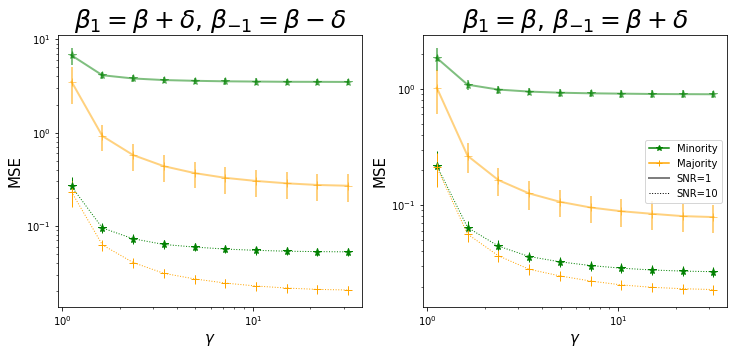

In [9]:
SNRs = [1, 10]
ltys = ['-', ':']
lws = [2, 1]
alphas = [0.5, 1]
add_on = 4 ** np.array(range(6))
#setups = ['same-core-over-envs', 'different-core-over-envs']
setups = ['same-core', 'diff-core']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharex=True)
for s, (setup, name) in enumerate(zip(setups, names)):
    result_setup = result.loc[result['setup']==setup]
    for i, (SNR, lty, lw, alpha) in enumerate(zip(SNRs, ltys, lws, alphas)):
        result1 = result_setup.loc[result['SNR']==SNR]
        nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

        mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
        mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
        ax[s].errorbar(nodes/200, mean_minor, std_minor, color = 'g', linestyle = lty,\
             marker = '*', markersize = 8, lw = lw, alpha = alpha)
        ax[s].errorbar(nodes * (1)/200, mean_major, std_major, color = 'orange', linestyle = lty,\
         marker = '+', markersize = 8, lw = lw, alpha = alpha)
        #ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         #markersize = 8, lw = lw, alpha = alpha)
        ax[s].set_yscale('log')
        ax[s].set_xscale('log')
        ax[s].set_xlabel('$\\gamma$', fontsize = 15)
        ax[s].set_ylabel('MSE', fontsize = 15)
        ax[s].set_title(name, fontsize = 25)
        #ax[s].set_ylim(0, 20)
        
    
lines = [Line2D([0], [0], color='g', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+')]#, \
        #Line2D([0], [0], color='g', linestyle='-', marker='x')\
        #]  
labels = ['Minority', 'Majority']#, 'Balanced Train']
for i, (SNR, lty, lw, alpha) in enumerate(zip(SNRs, ltys, lws, alphas)):
    lines.append(Line2D([0], [0], color='k', linestyle=lty, lw = lw, alpha = alpha))
    j = i-1
    labels.append(f'SNR={SNR}')
plt.legend(lines, labels, fontsize = 10)
plt.savefig('pdf_plots/plot.pdf')

In [16]:
import numpy as np
n, d = 200, 10
np.random.seed(1)
gammas = np.logspace(0, 3, num = 10)
nodes_list = np.rint(10 * gammas).astype('int')


def sample_from_sphere(n, d):
    x = np.random.normal(size = (n, d))
    x = (x.T/np.linalg.norm(x, axis = 1)).T
    return x

for nodes in nodes_list:
    w = sample_from_sphere(d, nodes)
    np.save(f'weights/w_{d}_{nodes}.npy', w)

### Testing 

import numpy as np
n, p = 200, 0.9
n1, n2 = int(n * p), int(n * (1-p))
SNR = 10
sigma = 0.1

x1, x2 = np.random.normal(size = (n1, 10)), np.random.normal(size = (n2, 10))
beta, delta = np.array([1] * 5 + [0] * 5).reshape((-1,1)),\
     np.sqrt(1)*np.array([0] * 5 + [1]*5).reshape((-1,1))
beta, delta =  2 * beta / np.linalg.norm(beta), (1/SNR) * delta / np.linalg.norm(delta)
y1, y2 = x1 @ (beta + delta) + sigma * np.random.normal(size=(n1, 1)),\
     x2 @ (beta - delta) + sigma * np.random.normal(size = (n2, 1))
sample_weights = np.array([(1-p)] * n1 + [p] * n2)
train_data = np.vstack((x1, x2)), np.vstack((y1, y2)), sample_weights


x_test = np.random.normal(size = (1000, 10))
y_test = x_test @ (beta - delta) + sigma * np.random.normal(size = (1000, 1))
test_minority = x_test, y_test

x_test = np.random.normal(size = (1000, 10))
y_test = x_test @ (beta + delta) + sigma * np.random.normal(size = (1000, 1))
test_majority = x_test, y_test

def hidden_layer(x, w):
    z = x @ w
    z[z<0]=0
    return z

def predict(x, weights):
    w, beta = weights
    z = hidden_layer(x, w)
    return z @ beta

def evaluate(data, weights, sample_weight = []):
    x, y = data
    n, _ = x.shape
    if sample_weight == []:
        sample_weight = np.array([1]*n)
    sample_weight = sample_weight/np.sum(sample_weight)
    y_hat = predict(x, weights)
    error = (y - y_hat).reshape((-1,))
    return np.sum(error ** 2 * sample_weight)


nodes = 990
weighted = True
x, y, sample_weight = train_data
_, input_shape = x.shape
w = np.load(f'weights/w_{input_shape}_{nodes}.npy') #np.random.normal(size = (input_shape, nodes))
z = hidden_layer(x, w)



z_w = z * np.sqrt(sample_weight.reshape((-1, 1)))
y_w = y * np.sqrt(sample_weight.reshape((-1, 1)))
    
beta = np.linalg.lstsq(z_w, y_w)[0]
    

### Evaluate 
evaluate((x, y), weights = [w, beta]), evaluate((x, y), weights = [w, beta],\
     sample_weight = sample_weight), evaluate(test_majority, weights = [w, beta]),\
         evaluate(test_minority, weights = [w, beta])

In [13]:
gammas = np.logspace(0, 3, num = 10)
np.rint(10 * gammas).astype('int')

array([  10,   19,   36,   68,  129,  245,  464,  880, 1668, 3162])